In [7]:
from prophet import Prophet
import pandas as pd

In [8]:
def pre_processing(df):
    # 날짜컬럼 시계열화
    df['날짜'] = pd.to_datetime(df['날짜'])

    # 날짜를 인덱스로 한다.
    df.set_index('날짜', inplace=True)

    # 날짜 인덱스를 일별로 리샘플링합니다.
    df = df.asfreq('D')

    # 결측치를 선형 보간합니다. (method ->  'linear', 'polynomial', 'spline' 도 가능)
    # df.interpolate(method='linear', inplace=True)
    df.interpolate(method='polynomial', order=3, inplace=True)
    df = df.reset_index()

    # 2023년 8월 31일 이전의 데이터만 선택
    # 2006년 8월 4일 이후의 데이터만 선택
    # df = df[df['날짜'] <= '2023-08-31']
    df = df[df['날짜'] >= '2006-08-04']
    df = df.reset_index(drop=True)

    return df

In [9]:
df = pd.read_csv('./Busheling_price.csv')
df=df[['날짜','생철A (Busheling A) 평균']]
df.drop_duplicates(subset='날짜',inplace=True)

df = pre_processing(df)
df.rename({'날짜':'ds','생철A (Busheling A) 평균':'y'},axis=1,inplace=True)
df.tail(30)

,ds,y
6170,2023-10-09,467.960068
6171,2023-10-10,468.000000
6172,2023-10-11,468.069044
6173,2023-10-12,468.166390
6174,2023-10-13,468.289820
6175,2023-10-14,468.437114
6176,2023-10-15,468.606055
6177,2023-10-16,468.794423
6178,2023-10-17,469.000000
6179,2023-10-18,469.215511


In [44]:
help(Prophet)

Help on class Prophet in module prophet.forecaster:

class Prophet(builtins.object)
 |  Prophet(growth='linear', changepoints=None, n_changepoints=25, changepoint_range=0.8, yearly_seasonality='auto', weekly_seasonality='auto', daily_seasonality='auto', holidays=None, seasonality_mode='additive', seasonality_prior_scale=10.0, holidays_prior_scale=10.0, changepoint_prior_scale=0.05, mcmc_samples=0, interval_width=0.8, uncertainty_samples=1000, stan_backend=None)
 |  
 |  Prophet forecaster.
 |  
 |  Parameters
 |  ----------
 |  growth: String 'linear', 'logistic' or 'flat' to specify a linear, logistic or
 |      flat trend.
 |  changepoints: List of dates at which to include potential changepoints. If
 |      not specified, potential changepoints are selected automatically.
 |  n_changepoints: Number of potential changepoints to include. Not used
 |      if input `changepoints` is supplied. If `changepoints` is not supplied,
 |      then n_changepoints potential changepoints are selec

In [49]:
model=Prophet()
df.sort_values(by='ds',inplace=True)
df.reset_index(drop=True, inplace=True)

data = df[len(df)-80:].reset_index(drop=True)
model.fit(data)
future=model.make_future_dataframe(periods=0,freq='D')
forecast=model.predict(future)
forecast

14:02:15 - cmdstanpy - INFO - Chain [1] start processing
14:02:15 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-08-20,469.025261,468.521245,469.299900,469.025261,469.025261,-0.111205,-0.111205,-0.111205,-0.111205,-0.111205,-0.111205,0.0,0.0,0.0,468.914056
1,2023-08-21,469.032555,468.605863,469.361764,469.032555,469.032555,-0.050601,-0.050601,-0.050601,-0.050601,-0.050601,-0.050601,0.0,0.0,0.0,468.981954
2,2023-08-22,469.039849,468.666419,469.451499,469.039849,469.039849,0.011609,0.011609,0.011609,0.011609,0.011609,0.011609,0.0,0.0,0.0,469.051459
3,2023-08-23,469.047143,468.731602,469.513045,469.047143,469.047143,0.070621,0.070621,0.070621,0.070621,0.070621,0.070621,0.0,0.0,0.0,469.117765
4,2023-08-24,469.054438,468.751335,469.556020,469.054438,469.054438,0.087593,0.087593,0.087593,0.087593,0.087593,0.087593,0.0,0.0,0.0,469.142031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,2023-11-03,458.474690,458.120394,458.896222,458.474690,458.474690,0.030323,0.030323,0.030323,0.030323,0.030323,0.030323,0.0,0.0,0.0,458.505013
76,2023-11-04,457.425762,457.003312,457.784813,457.425762,457.425762,-0.038341,-0.038341,-0.038341,-0.038341,-0.038341,-0.038341,0.0,0.0,0.0,457.387421
77,2023-11-05,456.376833,455.864300,456.674452,456.376833,456.376833,-0.111205,-0.111205,-0.111205,-0.111205,-0.111205,-0.111205,0.0,0.0,0.0,456.265628
78,2023-11-06,455.327904,454.883636,455.663643,455.327904,455.327904,-0.050601,-0.050601,-0.050601,-0.050601,-0.050601,-0.050601,0.0,0.0,0.0,455.277303


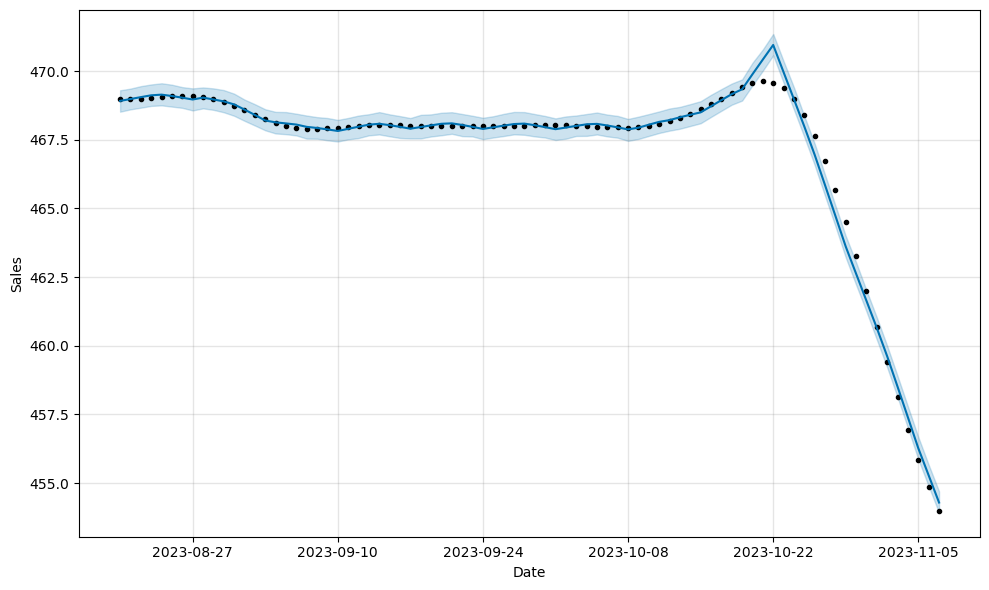

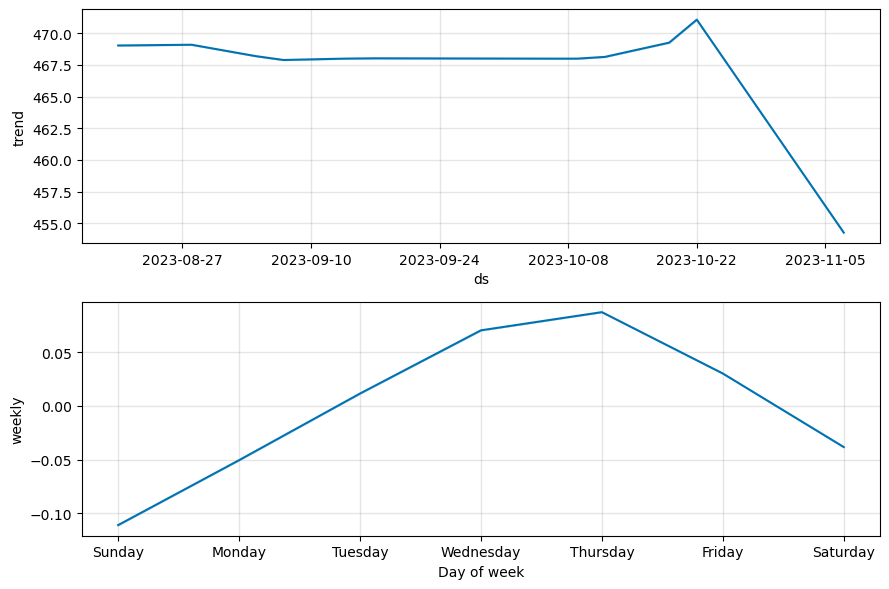

In [50]:
figure=model.plot(forecast, xlabel='Date',ylabel='Sales')
figure2=model.plot_components(forecast)

In [51]:
a=data['y']-forecast['yhat']
a.describe()

count    80.000000
mean     -0.000197
std       0.313913
min      -1.374377
25%      -0.066828
50%      -0.001174
75%       0.060616
max       0.942594
dtype: float64

In [52]:
len(a[(a >= -10) & (a <= 10)]) / len(a) * 100

100.0